In [29]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [3]:
df = pd.read_csv("Reviews.csv")
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


In [7]:
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [9]:
df = df.dropna()

In [11]:
print(df.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [21]:
# Convert the UNIX timestamp in 'Time' to a readable datetime format
df['review_date'] = pd.to_datetime(df['Time'], unit='s')

# Extract the year and month from the 'review_date' column
df['year'] = df['review_date'].dt.year
df['month'] = df['review_date'].dt.month

# Preview the DataFrame
print(df[['Time', 'review_date', 'year', 'month']].head())


         Time review_date  year  month
0  1303862400  2011-04-27  2011      4
1  1346976000  2012-09-07  2012      9
2  1219017600  2008-08-18  2008      8
3  1307923200  2011-06-13  2011      6
4  1350777600  2012-10-21  2012     10


In [19]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [33]:
df['helpful_votes'] = df['HelpfulnessNumerator'] / (df['HelpfulnessDenominator'] + 1e-9)

In [35]:
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
df['sentiment'] = df['Text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mschw\AppData\Roaming\nltk_data...


In [36]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns
numerical_cols = ['helpful_votes', 'sentiment', 'year', 'month']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify scaling
print(df[numerical_cols].head())

   helpful_votes  sentiment      year     month
0       1.281419   0.636489  0.272256 -0.722292
1      -0.882737  -2.603337  0.925116  0.745554
2       1.281419   0.384252 -1.686323  0.451985
3       1.281419  -1.388483  0.272256 -0.135154
4      -0.882737   0.642280  0.925116  1.039123


In [37]:
print(df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'helpful_votes', 'sentiment']].head())

   HelpfulnessNumerator  HelpfulnessDenominator  helpful_votes  sentiment
0                     1                       1       1.281419   0.636489
1                     0                       0      -0.882737  -2.603337
2                     1                       1       1.281419   0.384252
3                     3                       3       1.281419  -1.388483
4                     0                       0      -0.882737   0.642280


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
X = df[['helpful_votes', 'sentiment', 'year', 'month']]
y = df['Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.3101421007835026
R^2 Score: 0.23916686992590586


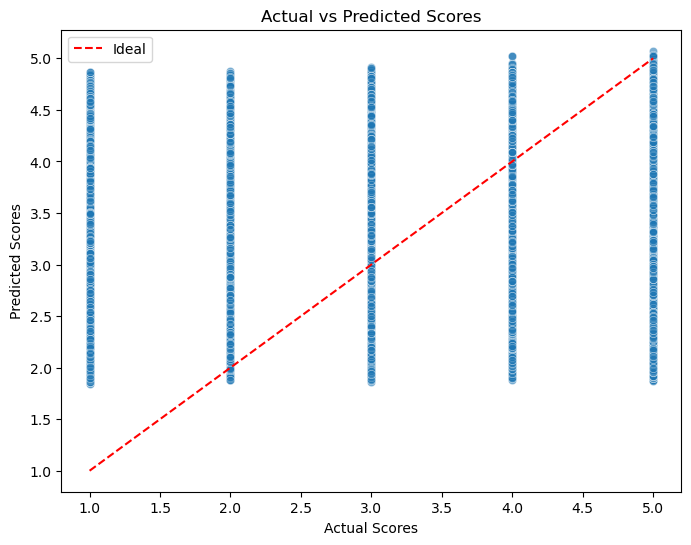

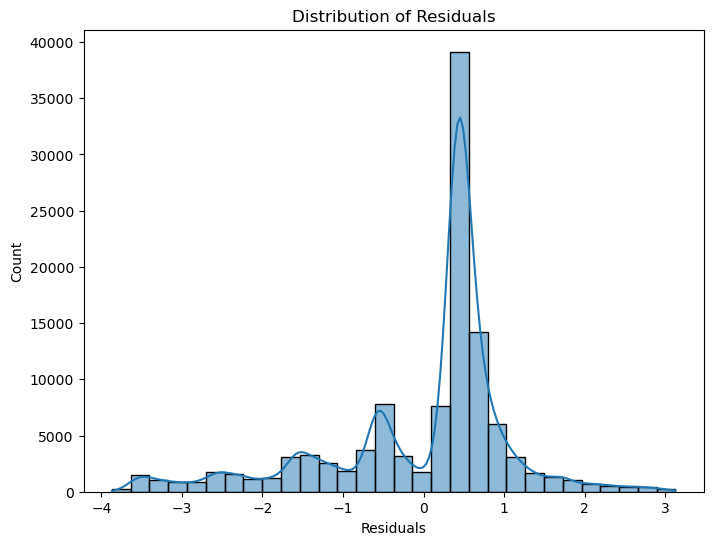

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.legend()
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

In [54]:
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [ 0.00763987  0.64258963 -0.06690976 -0.00894854]
Intercept: 4.182544119160343


In [74]:
from scipy.optimize import curve_fit
import numpy as np

# Define a polynomial function to fit
def sigmoid(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))



# Use helpful_votes as x and Score as y
x = df['helpful_votes']
y = df['Score']

# Fit the curve
params, covariance = curve_fit(polynomial, x, y)

# Predict using the fitted curve
df['predicted_score'] = polynomial(x, *params)


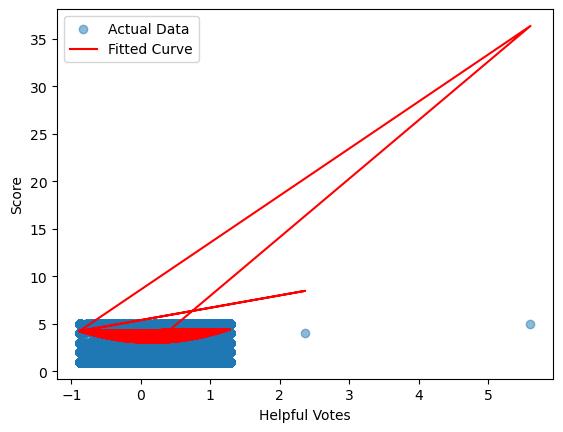

In [77]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

plt.scatter(x, y, label='Actual Data', alpha=0.5)
plt.plot(x, polynomial(x, *params), color='red', label='Fitted Curve')
plt.xlabel('Helpful Votes')
plt.ylabel('Score')
plt.legend()
plt.show()


In [79]:
from sklearn.metrics import r2_score

y_fitted = exponential(x_scaled, *params)
r2 = r2_score(y_scaled, y_fitted)
print(f"R² Score: {r2:.2f}")


R² Score: -18.26


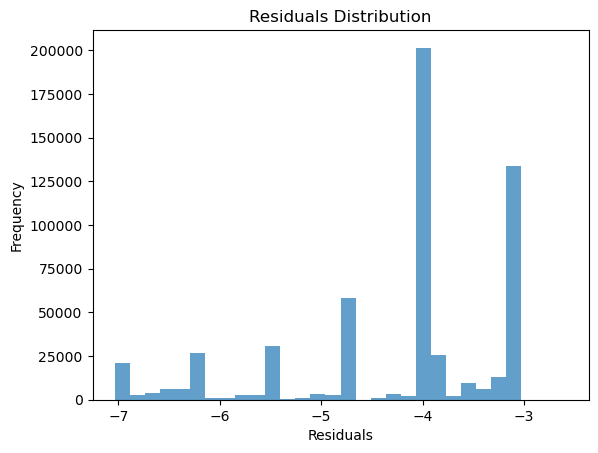

In [81]:
residuals = y_scaled - y_fitted
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load dataset
# Assuming the preprocessed dataset is stored in df
X = df[['helpful_votes', 'year', 'month']]
y = df['sentiment']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Linear Regression ###
# Initialize and fit the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_linear:.4f}")
print(f"R-squared: {r2_linear:.4f}")

# Visualize linear regression results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label="Perfect Prediction")
plt.xlabel("Actual Sentiment")
plt.ylabel("Predicted Sentiment")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.show()

### Curve Fitting ###
# Define a quadratic function for curve fitting
def quadratic(x, a, b, c):
    return a * x ** 2 + b * x + c

# Use only one feature (e.g., helpful_votes) for curve fitting
x_train_curve = X_train['helpful_votes']
x_test_curve = X_test['helpful_votes']

# Fit the curve
params, _ = curve_fit(quadratic, x_train_curve, y_train)

# Predict using the fitted curve
y_pred_curve = quadratic(x_test_curve, *params)

# Calculate metrics
mse_curve = mean_squared_error(y_test, y_pred_curve)
r2_curve = r2_score(y_test, y_pred_curve)

print("\nCurve Fitting Results:")
print(f"Mean Squared Error: {mse_curve:.4f}")
print(f"R-squared: {r2_curve:.4f}")

# Visualize curve fitting results
plt.figure(figsize=(8, 6))
plt.scatter(x_test_curve, y_test, alpha=0.5, label="Actual Sentiment")
plt.scatter(x_test_curve, y_pred_curve, alpha=0.5, label="Predicted Sentiment", color='orange')
plt.plot(np.sort(x_test_curve), quadratic(np.sort(x_test_curve), *params), '-g', label="Fitted Curve")
plt.xlabel("Helpful Votes")
plt.ylabel("Sentiment")
plt.title("Curve Fitting: Predicted vs Actual")
plt.legend()
plt.show()